<a href="https://colab.research.google.com/github/handikamsf/classification/blob/main/san-francisco-crime-classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Wrangling A**

**Kelompok:** 7

---

**Nama (NPM):**

Saif Ali Zaky A. (24083010004)

M. Handika M. S. (24083010036)

Rizky Faza H. N. (24083010099)

Indra Maulana R. F. Y. (24083010105)

Yafi Rafsanjani H. (24083010122)


---


**Dosen Pengampu:**

Kartika Maulida Hindrayani, S.Kom., M.Kom

Andri Fauzan Adziima, M.Si.

# **Dataset**

In [ ]:
!pip install xgboost
!pip install category_encoders
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 4.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.metrics import accuracy_score,roc_auc_score, confusion_matrix, classification_report,precision_score,recall_score
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,StackingClassifier,VotingClassifier,BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
from xgboost import plot_tree,plot_importance
import statistics as st
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import tensorflow as tf
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
uploaded = files.upload()

import os
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
!kaggle datasets download -d kaggle/san-francisco-crime-classification

Dataset URL: https://www.kaggle.com/datasets/kaggle/san-francisco-crime-classification
License(s): unknown
  0% 0.00/41.3M [00:00<?, ?B/s]
100% 41.3M/41.3M [00:00<00:00, 1.29GB/s]


In [ ]:
!unzip san-francisco-crime-classification.zip

Archive:  san-francisco-crime-classification.zip
  inflating: test.csv                
  inflating: train.csv               


# **Eksplorasi Data Awal**

In [ ]:
df = pd.read_csv("train.csv")
df

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541
...,...,...,...,...,...,...,...,...,...
878044,2003-01-06 00:15:00,ROBBERY,ROBBERY ON THE STREET WITH A GUN,Monday,TARAVAL,NONE,FARALLONES ST / CAPITOL AV,-122.459033,37.714056
878045,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,600 Block of EDNA ST,-122.447364,37.731948
878046,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,SOUTHERN,NONE,5TH ST / FOLSOM ST,-122.403390,37.780266
878047,2003-01-06 00:01:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Monday,SOUTHERN,NONE,TOWNSEND ST / 2ND ST,-122.390531,37.780607


In [ ]:
df_test = pd.read_csv("test.csv")
df_test

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
...,...,...,...,...,...,...,...
884257,884257,2003-01-01 00:01:00,Wednesday,MISSION,2600 Block of BRYANT ST,-122.408983,37.751987
884258,884258,2003-01-01 00:01:00,Wednesday,NORTHERN,1900 Block of WASHINGTON ST,-122.425342,37.792681
884259,884259,2003-01-01 00:01:00,Wednesday,INGLESIDE,5500 Block of MISSION ST,-122.445418,37.712075
884260,884260,2003-01-01 00:01:00,Wednesday,BAYVIEW,1500 Block of HUDSON AV,-122.387394,37.739479


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dates       878049 non-null  object 
 1   Category    878049 non-null  object 
 2   Descript    878049 non-null  object 
 3   DayOfWeek   878049 non-null  object 
 4   PdDistrict  878049 non-null  object 
 5   Resolution  878049 non-null  object 
 6   Address     878049 non-null  object 
 7   X           878049 non-null  float64
 8   Y           878049 non-null  float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


In [ ]:
df.isnull().sum()

,0
Dates,0
Category,0
Descript,0
DayOfWeek,0
PdDistrict,0
Resolution,0
Address,0
X,0
Y,0


In [ ]:
df_categorical = df.select_dtypes(include='object')
df_numerical = df.select_dtypes(exclude='object')

In [ ]:
df_categorical.describe()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address
count,878049,878049,878049,878049,878049,878049,878049
unique,389257,39,879,7,10,17,23228
top,2011-01-01 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,SOUTHERN,NONE,800 Block of BRYANT ST
freq,185,174900,60022,133734,157182,526790,26533


In [ ]:
df_numerical.describe()

,X,Y
count,878049.000000,878049.000000
mean,-122.422616,37.771020
std,0.030354,0.456893
min,-122.513642,37.707879
25%,-122.432952,37.752427
50%,-122.416420,37.775421
75%,-122.406959,37.784369
max,-120.500000,90.000000


# **Formatting Data**


**Membuat Kolom Baru**

In [ ]:
df_try = df.copy()

In [ ]:
def change_datetime(df):
    df['Dates'] = pd.to_datetime(df['Dates'])
    df['Year'] = df['Dates'].dt.year
    df['Month'] = df['Dates'].dt.month
    df['Day'] = df['Dates'].dt.day
    df['Hour'] = df['Dates'].dt.hour
    df['Minute'] = df['Dates'].dt.minute
    df['DayOfWeek'] = df['Dates'].dt.day_name()
    return df

change_datetime(df_try)
df_try

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year,Month,Day,Hour,Minute
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,53
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,53
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,13,23,33
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,13,23,30
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,13,23,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878044,2003-01-06 00:15:00,ROBBERY,ROBBERY ON THE STREET WITH A GUN,Monday,TARAVAL,NONE,FARALLONES ST / CAPITOL AV,-122.459033,37.714056,2003,1,6,0,15
878045,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,600 Block of EDNA ST,-122.447364,37.731948,2003,1,6,0,1
878046,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,SOUTHERN,NONE,5TH ST / FOLSOM ST,-122.403390,37.780266,2003,1,6,0,1
878047,2003-01-06 00:01:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Monday,SOUTHERN,NONE,TOWNSEND ST / 2ND ST,-122.390531,37.780607,2003,1,6,0,1


# **Data Cleaning**


**Drop Data Duplikat**

In [ ]:
def remove_duplicates(df):
    df.drop_duplicates(inplace=True)
    return df

remove_duplicates(df_try)
df_try

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year,Month,Day,Hour,Minute
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,53
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,53
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,13,23,33
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,13,23,30
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,13,23,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878044,2003-01-06 00:15:00,ROBBERY,ROBBERY ON THE STREET WITH A GUN,Monday,TARAVAL,NONE,FARALLONES ST / CAPITOL AV,-122.459033,37.714056,2003,1,6,0,15
878045,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,600 Block of EDNA ST,-122.447364,37.731948,2003,1,6,0,1
878046,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,SOUTHERN,NONE,5TH ST / FOLSOM ST,-122.403390,37.780266,2003,1,6,0,1
878047,2003-01-06 00:01:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Monday,SOUTHERN,NONE,TOWNSEND ST / 2ND ST,-122.390531,37.780607,2003,1,6,0,1


**Outlier**

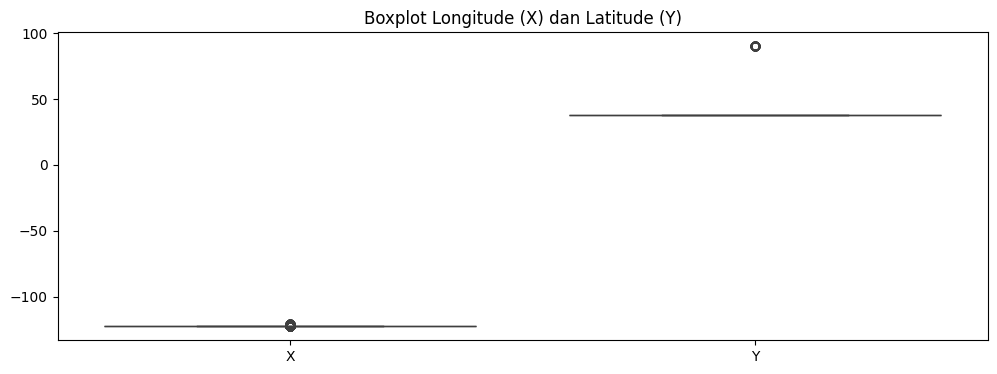

In [ ]:
plt.figure(figsize=(12, 4))
sns.boxplot(data=df_try[["X", "Y"]])
plt.title("Boxplot Longitude (X) dan Latitude (Y)")
plt.show()

In [ ]:
def clean_long_lat(df):
    df.loc[
        (df["X"] >= -123) & (df["X"] <= -121) &
        (df["Y"] >= 37) & (df["Y"] <= 38)
    ].copy()
    return df

clean_long_lat(df_try)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year,Month,Day,Hour,Minute
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,53
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,53
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,13,23,33
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,13,23,30
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,13,23,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878044,2003-01-06 00:15:00,ROBBERY,ROBBERY ON THE STREET WITH A GUN,Monday,TARAVAL,NONE,FARALLONES ST / CAPITOL AV,-122.459033,37.714056,2003,1,6,0,15
878045,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,600 Block of EDNA ST,-122.447364,37.731948,2003,1,6,0,1
878046,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,SOUTHERN,NONE,5TH ST / FOLSOM ST,-122.403390,37.780266,2003,1,6,0,1
878047,2003-01-06 00:01:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Monday,SOUTHERN,NONE,TOWNSEND ST / 2ND ST,-122.390531,37.780607,2003,1,6,0,1


In [ ]:
df_try.describe()

,Dates,X,Y,Year,Month,Day,Hour,Minute
count,875726,875726.000000,875726.000000,875726.000000,875726.000000,875726.000000,875726.000000,875726.000000
mean,2009-03-16 09:08:31.826667776,-122.422623,37.771032,2008.712151,6.436136,15.573293,13.413587,20.169907
min,2003-01-06 00:01:00,-122.513642,37.707879,2003.000000,1.000000,1.000000,0.000000,0.000000
25%,2006-01-11 01:04:45,-122.432952,37.752427,2006.000000,3.000000,8.000000,9.000000,0.000000
50%,2009-03-07 16:37:30,-122.416446,37.775421,2009.000000,6.000000,16.000000,14.000000,19.000000
75%,2012-06-11 11:15:00,-122.406959,37.784380,2012.000000,9.000000,23.000000,19.000000,33.000000
max,2015-05-13 23:53:00,-120.500000,90.000000,2015.000000,12.000000,31.000000,23.000000,59.000000
std,NaN,0.030363,0.457497,3.631405,3.429059,8.782879,6.549189,18.595830


**Hapus Fitur Tidak Dipakai**

In [ ]:
def remove_columns(df):
    df.drop(['Dates','Descript','Resolution','Address'],axis=1,inplace=True)
    return df

remove_columns(df_try)
df_try

,Category,DayOfWeek,PdDistrict,X,Y,Year,Month,Day,Hour,Minute
0,WARRANTS,Wednesday,NORTHERN,-122.425892,37.774599,2015,5,13,23,53
1,OTHER OFFENSES,Wednesday,NORTHERN,-122.425892,37.774599,2015,5,13,23,53
2,OTHER OFFENSES,Wednesday,NORTHERN,-122.424363,37.800414,2015,5,13,23,33
3,LARCENY/THEFT,Wednesday,NORTHERN,-122.426995,37.800873,2015,5,13,23,30
4,LARCENY/THEFT,Wednesday,PARK,-122.438738,37.771541,2015,5,13,23,30
...,...,...,...,...,...,...,...,...,...,...
878044,ROBBERY,Monday,TARAVAL,-122.459033,37.714056,2003,1,6,0,15
878045,LARCENY/THEFT,Monday,INGLESIDE,-122.447364,37.731948,2003,1,6,0,1
878046,LARCENY/THEFT,Monday,SOUTHERN,-122.403390,37.780266,2003,1,6,0,1
878047,VANDALISM,Monday,SOUTHERN,-122.390531,37.780607,2003,1,6,0,1


**Simpan CSV**

In [ ]:
save_csv = df_try.to_csv('train_clean.csv', index=False)

# **Eksplorasi SQL Query**

**Import Database SQL**

In [ ]:
import sqlite3

In [ ]:
conn = sqlite3.connect('crime_data.db')
df = pd.read_csv('train_clean.csv')
df.to_sql('crime_incidents', conn, if_exists='replace', index=False)

conn.close()

In [ ]:
conn = sqlite3.connect('crime_data.db')
cursor = conn.cursor()

# Mendapatkan daftar tabel dalam database
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

print("Tabel dalam database:")
for table in tables:
    print(table[0])

# Contoh mengecek schema dari salah satu tabel (misal: 'crime_incidents')
print("\nSchema tabel 'crime_incidents':")
cursor.execute("PRAGMA table_info(crime_incidents);")
schema = cursor.fetchall()
for col in schema:
    print(col)

# Contoh mengecek 5 baris pertama dari tabel (misal: 'crime_incidents')
print("\n5 baris pertama dari tabel 'crime_incidents':")
cursor.execute("SELECT * FROM crime_incidents LIMIT 5;")
rows = cursor.fetchall()
for row in rows:
    print(row)

conn.close()

Tabel dalam database:
crime_incidents

Schema tabel 'crime_incidents':
(0, 'Category', 'TEXT', 0, None, 0)
(1, 'DayOfWeek', 'TEXT', 0, None, 0)
(2, 'PdDistrict', 'TEXT', 0, None, 0)
(3, 'X', 'REAL', 0, None, 0)
(4, 'Y', 'REAL', 0, None, 0)
(5, 'Year', 'INTEGER', 0, None, 0)
(6, 'Month', 'INTEGER', 0, None, 0)
(7, 'Day', 'INTEGER', 0, None, 0)
(8, 'Hour', 'INTEGER', 0, None, 0)
(9, 'Minute', 'INTEGER', 0, None, 0)

5 baris pertama dari tabel 'crime_incidents':
('WARRANTS', 'Wednesday', 'NORTHERN', -122.425891675136, 37.7745985956747, 2015, 5, 13, 23, 53)
('OTHER OFFENSES', 'Wednesday', 'NORTHERN', -122.425891675136, 37.7745985956747, 2015, 5, 13, 23, 53)
('OTHER OFFENSES', 'Wednesday', 'NORTHERN', -122.42436302145, 37.8004143219856, 2015, 5, 13, 23, 33)
('LARCENY/THEFT', 'Wednesday', 'NORTHERN', -122.426995326766, 37.80087263276921, 2015, 5, 13, 23, 30)
('LARCENY/THEFT', 'Wednesday', 'PARK', -122.438737622757, 37.7715411720578, 2015, 5, 13, 23, 30)


In [ ]:
con = sqlite3.connect('crime_data.db')
cur = con.cursor()

for row in cur.execute("SELECT Category, COUNT(*) AS jumlah FROM crime_incidents GROUP BY Category ORDER BY jumlah DESC"):
    print(row)

con.commit()
con.close()

('LARCENY/THEFT', 174320)
('OTHER OFFENSES', 125960)
('NON-CRIMINAL', 91915)
('ASSAULT', 76815)
('DRUG/NARCOTIC', 53919)
('VEHICLE THEFT', 53706)
('VANDALISM', 44581)
('WARRANTS', 42145)
('BURGLARY', 36600)
('SUSPICIOUS OCC', 31394)
('MISSING PERSON', 25669)
('ROBBERY', 22988)
('FRAUD', 16637)
('FORGERY/COUNTERFEITING', 10592)
('SECONDARY CODES', 9979)
('WEAPON LAWS', 8550)
('PROSTITUTION', 7446)
('TRESPASS', 7318)
('STOLEN PROPERTY', 4537)
('SEX OFFENSES FORCIBLE', 4380)
('DISORDERLY CONDUCT', 4313)
('DRUNKENNESS', 4277)
('RECOVERED VEHICLE', 3132)
('KIDNAPPING', 2340)
('DRIVING UNDER THE INFLUENCE', 2268)
('LIQUOR LAWS', 1899)
('RUNAWAY', 1894)
('ARSON', 1512)
('LOITERING', 1207)
('EMBEZZLEMENT', 1164)
('SUICIDE', 508)
('FAMILY OFFENSES', 488)
('BAD CHECKS', 406)
('BRIBERY', 289)
('EXTORTION', 256)
('SEX OFFENSES NON FORCIBLE', 148)
('GAMBLING', 146)
('PORNOGRAPHY/OBSCENE MAT', 22)
('TREA', 6)


In [ ]:
con = sqlite3.connect('crime_data.db')
cur = con.cursor()

for row in cur.execute("SELECT PdDistrict, COUNT(*) AS jumlah FROM crime_incidents GROUP BY PdDistrict ORDER BY jumlah DESC"):
    print(row)

con.commit()
con.close()

('SOUTHERN', 156528)
('MISSION', 119723)
('NORTHERN', 105105)
('BAYVIEW', 89098)
('CENTRAL', 85267)
('TENDERLOIN', 81642)
('INGLESIDE', 78722)
('TARAVAL', 65400)
('PARK', 49161)
('RICHMOND', 45080)


In [ ]:
con = sqlite3.connect('crime_data.db')
cur = con.cursor()

for row in cur.execute("SELECT PdDistrict, Category, COUNT(*) AS jumlah FROM crime_incidents GROUP BY PdDistrict, Category ORDER BY PdDistrict, jumlah DESC"):
    print(row)

con.commit()
con.close()

('BAYVIEW', 'OTHER OFFENSES', 17030)
('BAYVIEW', 'LARCENY/THEFT', 10075)
('BAYVIEW', 'ASSAULT', 9845)
('BAYVIEW', 'VEHICLE THEFT', 7199)
('BAYVIEW', 'NON-CRIMINAL', 6083)
('BAYVIEW', 'VANDALISM', 5344)
('BAYVIEW', 'MISSING PERSON', 4875)
('BAYVIEW', 'DRUG/NARCOTIC', 4496)
('BAYVIEW', 'WARRANTS', 4319)
('BAYVIEW', 'BURGLARY', 3914)
('BAYVIEW', 'SUSPICIOUS OCC', 3903)
('BAYVIEW', 'ROBBERY', 2713)
('BAYVIEW', 'SECONDARY CODES', 1661)
('BAYVIEW', 'WEAPON LAWS', 1645)
('BAYVIEW', 'FRAUD', 865)
('BAYVIEW', 'FORGERY/COUNTERFEITING', 773)
('BAYVIEW', 'RECOVERED VEHICLE', 732)
('BAYVIEW', 'TRESPASS', 635)
('BAYVIEW', 'STOLEN PROPERTY', 397)
('BAYVIEW', 'ARSON', 393)
('BAYVIEW', 'SEX OFFENSES FORCIBLE', 385)
('BAYVIEW', 'KIDNAPPING', 313)
('BAYVIEW', 'RUNAWAY', 260)
('BAYVIEW', 'DRUNKENNESS', 243)
('BAYVIEW', 'DISORDERLY CONDUCT', 218)
('BAYVIEW', 'DRIVING UNDER THE INFLUENCE', 179)
('BAYVIEW', 'LIQUOR LAWS', 114)
('BAYVIEW', 'EMBEZZLEMENT', 100)
('BAYVIEW', 'FAMILY OFFENSES', 73)
('BAYVIEW', 'P

In [ ]:
con = sqlite3.connect('crime_data.db')
cur = con.cursor()

for row in cur.execute("SELECT Month, COUNT(*) AS jumlah FROM crime_incidents GROUP BY Month ORDER BY jumlah DESC"):
    print(row)

con.commit()
con.close()

(10, 80038)
(5, 79467)
(4, 77889)
(3, 76130)
(1, 73335)
(11, 72748)
(9, 71805)
(6, 70666)
(2, 70666)
(7, 69785)
(8, 68341)
(12, 64856)


In [ ]:
con = sqlite3.connect('crime_data.db')
cur = con.cursor()

for row in cur.execute("SELECT DayOfWeek, COUNT(*) AS jumlah FROM crime_incidents GROUP BY DayOfWeek ORDER BY jumlah DESC"):
    print(row)

con.commit()
con.close()

('Friday', 133371)
('Wednesday', 128829)
('Saturday', 126469)
('Thursday', 124757)
('Tuesday', 124603)
('Monday', 121303)
('Sunday', 116394)


In [ ]:
con = sqlite3.connect('crime_data.db')
cur = con.cursor()

for row in cur.execute("SELECT Hour AS jam, COUNT(*) AS jumlah FROM crime_incidents GROUP BY jam ORDER BY jumlah DESC"):
    print(row)

con.commit()
con.close()

(18, 54978)
(17, 53417)
(12, 51793)
(16, 50021)
(19, 49354)
(15, 47920)
(22, 45618)
(0, 44684)
(20, 44582)
(14, 44318)
(21, 43533)
(13, 43059)
(23, 42359)
(11, 38272)
(10, 37709)
(9, 35440)
(8, 32784)
(1, 26125)
(2, 22261)
(7, 21965)
(3, 13988)
(6, 13089)
(4, 9848)
(5, 8609)


In [ ]:
con = sqlite3.connect('crime_data.db')
cur = con.cursor()

for row in cur.execute("WITH ranked AS (SELECT PdDistrict, Category, COUNT(*) AS jumlah, ROW_NUMBER() OVER (PARTITION BY PdDistrict ORDER BY COUNT(*) DESC) AS rank FROM crime_incidents GROUP BY PdDistrict, Category) SELECT PdDistrict, Category, jumlah FROM ranked WHERE rank <= 5 ORDER BY PdDistrict, rank;"):
    print(row)

con.commit()
con.close()

('BAYVIEW', 'OTHER OFFENSES', 17030)
('BAYVIEW', 'LARCENY/THEFT', 10075)
('BAYVIEW', 'ASSAULT', 9845)
('BAYVIEW', 'VEHICLE THEFT', 7199)
('BAYVIEW', 'NON-CRIMINAL', 6083)
('CENTRAL', 'LARCENY/THEFT', 24973)
('CENTRAL', 'NON-CRIMINAL', 10923)
('CENTRAL', 'OTHER OFFENSES', 8893)
('CENTRAL', 'ASSAULT', 6971)
('CENTRAL', 'BURGLARY', 4499)
('INGLESIDE', 'OTHER OFFENSES', 13176)
('INGLESIDE', 'LARCENY/THEFT', 10207)
('INGLESIDE', 'VEHICLE THEFT', 8950)
('INGLESIDE', 'ASSAULT', 8522)
('INGLESIDE', 'NON-CRIMINAL', 6846)
('MISSION', 'OTHER OFFENSES', 19308)
('MISSION', 'LARCENY/THEFT', 18201)
('MISSION', 'NON-CRIMINAL', 12344)
('MISSION', 'ASSAULT', 11146)
('MISSION', 'DRUG/NARCOTIC', 8750)
('NORTHERN', 'LARCENY/THEFT', 28566)
('NORTHERN', 'OTHER OFFENSES', 12226)
('NORTHERN', 'NON-CRIMINAL', 10206)
('NORTHERN', 'ASSAULT', 8312)
('NORTHERN', 'VEHICLE THEFT', 6286)
('PARK', 'LARCENY/THEFT', 9118)
('PARK', 'OTHER OFFENSES', 6180)
('PARK', 'NON-CRIMINAL', 5886)
('PARK', 'VEHICLE THEFT', 3955)
('PA

In [ ]:
con = sqlite3.connect('crime_data.db')
cur = con.cursor()

for row in cur.execute("SELECT MIN(X), MAX(X), AVG(X), MIN(Y), MAX(Y), AVG(Y) FROM crime_incidents;"):
    print(row)

con.commit()
con.close()

(-122.51364206429, -120.5, -122.42262304094197, 37.7078790224135, 90.0, 37.77103233057851)


# **Data Encoding**

In [ ]:
# One Hot encoding base function
def one_hot_encoding(df,col):
    one_hot_encoder= ce.OneHotEncoder(cols=col,return_df=True,use_cat_names=True,handle_unknown='ignore')
    df_final = one_hot_encoder.fit_transform(df)
    return df_final

# Applying one hot encoding on all required columns
def apply_one_hot_encoding(df):
    df_final = one_hot_encoding(df,"PdDistrict")
    df_final = one_hot_encoding(df_final,"DayOfWeek")
    return df_final

apply_one_hot_encoding(df_try)

,Category,DayOfWeek_Wednesday,DayOfWeek_Tuesday,DayOfWeek_Monday,DayOfWeek_Sunday,DayOfWeek_Saturday,DayOfWeek_Friday,DayOfWeek_Thursday,PdDistrict_NORTHERN,PdDistrict_PARK,...,PdDistrict_TENDERLOIN,PdDistrict_MISSION,PdDistrict_SOUTHERN,X,Y,Year,Month,Day,Hour,Minute
0,WARRANTS,1,0,0,0,0,0,0,1,0,...,0,0,0,-122.425892,37.774599,2015,5,13,23,53
1,OTHER OFFENSES,1,0,0,0,0,0,0,1,0,...,0,0,0,-122.425892,37.774599,2015,5,13,23,53
2,OTHER OFFENSES,1,0,0,0,0,0,0,1,0,...,0,0,0,-122.424363,37.800414,2015,5,13,23,33
3,LARCENY/THEFT,1,0,0,0,0,0,0,1,0,...,0,0,0,-122.426995,37.800873,2015,5,13,23,30
4,LARCENY/THEFT,1,0,0,0,0,0,0,0,1,...,0,0,0,-122.438738,37.771541,2015,5,13,23,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878044,ROBBERY,0,0,1,0,0,0,0,0,0,...,0,0,0,-122.459033,37.714056,2003,1,6,0,15
878045,LARCENY/THEFT,0,0,1,0,0,0,0,0,0,...,0,0,0,-122.447364,37.731948,2003,1,6,0,1
878046,LARCENY/THEFT,0,0,1,0,0,0,0,0,0,...,0,0,1,-122.403390,37.780266,2003,1,6,0,1
878047,VANDALISM,0,0,1,0,0,0,0,0,0,...,0,0,1,-122.390531,37.780607,2003,1,6,0,1


In [ ]:
# Label encoding base function
def label_encoding(df,col):
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col])
  return df

# Applying label encoding on all required columns
def apply_label_encoding(df):
    df_final = label_encoding(df,"Category")
    return df_final

apply_label_encoding(df_try)

,Category,DayOfWeek,PdDistrict,X,Y,Year,Month,Day,Hour,Minute
0,37,Wednesday,NORTHERN,-122.425892,37.774599,2015,5,13,23,53
1,21,Wednesday,NORTHERN,-122.425892,37.774599,2015,5,13,23,53
2,21,Wednesday,NORTHERN,-122.424363,37.800414,2015,5,13,23,33
3,16,Wednesday,NORTHERN,-122.426995,37.800873,2015,5,13,23,30
4,16,Wednesday,PARK,-122.438738,37.771541,2015,5,13,23,30
...,...,...,...,...,...,...,...,...,...,...
878044,25,Monday,TARAVAL,-122.459033,37.714056,2003,1,6,0,15
878045,16,Monday,INGLESIDE,-122.447364,37.731948,2003,1,6,0,1
878046,16,Monday,SOUTHERN,-122.403390,37.780266,2003,1,6,0,1
878047,35,Monday,SOUTHERN,-122.390531,37.780607,2003,1,6,0,1


# **Data Scaling**

In [ ]:
def scaling_numeric(df,col):
  ss = StandardScaler()
  df[col] = ss.fit_transform(df[[col]])
  return df

def apply_scaling(df):
  df_scaled = scaling_numeric(df,"X")
  df_scaled = scaling_numeric(df_scaled,"Y")
  df_scaled = scaling_numeric(df_scaled,"Year")
  df_scaled = scaling_numeric(df_scaled,"Month")
  df_scaled = scaling_numeric(df_scaled,"Day")
  df_scaled = scaling_numeric(df_scaled,"Hour")
  df_scaled = scaling_numeric(df_scaled,"Minute")
  return df_scaled

apply_scaling(df_try)

,Category,DayOfWeek,PdDistrict,X,Y,Year,Month,Day,Hour,Minute
0,37,Wednesday,NORTHERN,-0.107651,0.007795,1.731521,-0.418814,-0.292990,1.463757,1.765456
1,21,Wednesday,NORTHERN,-0.107651,0.007795,1.731521,-0.418814,-0.292990,1.463757,1.765456
2,21,Wednesday,NORTHERN,-0.057306,0.064223,1.731521,-0.418814,-0.292990,1.463757,0.689945
3,16,Wednesday,NORTHERN,-0.144000,0.065225,1.731521,-0.418814,-0.292990,1.463757,0.528618
4,16,Wednesday,PARK,-0.530728,0.001112,1.731521,-0.418814,-0.292990,1.463757,0.528618
...,...,...,...,...,...,...,...,...,...,...
878044,25,Monday,TARAVAL,-1.199151,-0.124539,-1.572987,-1.585315,-1.089996,-2.048131,-0.278014
878045,16,Monday,INGLESIDE,-0.814818,-0.085432,-1.572987,-1.585315,-1.089996,-2.048131,-1.030872
878046,16,Monday,SOUTHERN,0.633421,0.020182,-1.572987,-1.585315,-1.089996,-2.048131,-1.030872
878047,35,Monday,SOUTHERN,1.056926,0.020929,-1.572987,-1.585315,-1.089996,-2.048131,-1.030872


# **Modelling Data**

In [ ]:
# Independent & Dependent Variables Split
def XY_Split(df):
    X = df.drop("Category",axis=1)
    y = pd.DataFrame(df["Category"])
    return X,y

XY_Split(df_try)

(        DayOfWeek PdDistrict         X         Y      Year     Month  \
 0       Wednesday   NORTHERN -0.107651  0.007795  1.731521 -0.418814   
 1       Wednesday   NORTHERN -0.107651  0.007795  1.731521 -0.418814   
 2       Wednesday   NORTHERN -0.057306  0.064223  1.731521 -0.418814   
 3       Wednesday   NORTHERN -0.144000  0.065225  1.731521 -0.418814   
 4       Wednesday       PARK -0.530728  0.001112  1.731521 -0.418814   
 ...           ...        ...       ...       ...       ...       ...   
 878044     Monday    TARAVAL -1.199151 -0.124539 -1.572987 -1.585315   
 878045     Monday  INGLESIDE -0.814818 -0.085432 -1.572987 -1.585315   
 878046     Monday   SOUTHERN  0.633421  0.020182 -1.572987 -1.585315   
 878047     Monday   SOUTHERN  1.056926  0.020929 -1.572987 -1.585315   
 878048     Monday    BAYVIEW  0.912201 -0.071740 -1.572987 -1.585315   
 
              Day      Hour    Minute  
 0      -0.292990  1.463757  1.765456  
 1      -0.292990  1.463757  1.765456  
 2

In [ ]:
def clean_data(df):
    change_datetime(df)
    remove_duplicates(df)
    clean_long_lat(df)
    remove_columns(df)
    df_one_hot = apply_one_hot_encoding(df)
    df_label = apply_label_encoding(df_one_hot)
    df_prep = apply_scaling(df_label)
    X,y = XY_Split(df_prep)
    return df_prep,X,y

In [ ]:
df = pd.read_csv("train.csv")

In [ ]:
# Applying the  function for preprocessing for all features
df_prep, X, y = clean_data(df)

In [ ]:
df_prep

,Category,DayOfWeek_Wednesday,DayOfWeek_Tuesday,DayOfWeek_Monday,DayOfWeek_Sunday,DayOfWeek_Saturday,DayOfWeek_Friday,DayOfWeek_Thursday,PdDistrict_NORTHERN,PdDistrict_PARK,...,PdDistrict_TENDERLOIN,PdDistrict_MISSION,PdDistrict_SOUTHERN,X,Y,Year,Month,Day,Hour,Minute
0,37,1,0,0,0,0,0,0,1,0,...,0,0,0,-0.107651,0.007795,1.731521,-0.418814,-0.292990,1.463757,1.765456
1,21,1,0,0,0,0,0,0,1,0,...,0,0,0,-0.107651,0.007795,1.731521,-0.418814,-0.292990,1.463757,1.765456
2,21,1,0,0,0,0,0,0,1,0,...,0,0,0,-0.057306,0.064223,1.731521,-0.418814,-0.292990,1.463757,0.689945
3,16,1,0,0,0,0,0,0,1,0,...,0,0,0,-0.144000,0.065225,1.731521,-0.418814,-0.292990,1.463757,0.528618
4,16,1,0,0,0,0,0,0,0,1,...,0,0,0,-0.530728,0.001112,1.731521,-0.418814,-0.292990,1.463757,0.528618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878044,25,0,0,1,0,0,0,0,0,0,...,0,0,0,-1.199151,-0.124539,-1.572987,-1.585315,-1.089996,-2.048131,-0.278014
878045,16,0,0,1,0,0,0,0,0,0,...,0,0,0,-0.814818,-0.085432,-1.572987,-1.585315,-1.089996,-2.048131,-1.030872
878046,16,0,0,1,0,0,0,0,0,0,...,0,0,1,0.633421,0.020182,-1.572987,-1.585315,-1.089996,-2.048131,-1.030872
878047,35,0,0,1,0,0,0,0,0,0,...,0,0,1,1.056926,0.020929,-1.572987,-1.585315,-1.089996,-2.048131,-1.030872


In [ ]:
X

,DayOfWeek_Wednesday,DayOfWeek_Tuesday,DayOfWeek_Monday,DayOfWeek_Sunday,DayOfWeek_Saturday,DayOfWeek_Friday,DayOfWeek_Thursday,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_INGLESIDE,...,PdDistrict_TENDERLOIN,PdDistrict_MISSION,PdDistrict_SOUTHERN,X,Y,Year,Month,Day,Hour,Minute
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,-0.107651,0.007795,1.731521,-0.418814,-0.292990,1.463757,1.765456
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,-0.107651,0.007795,1.731521,-0.418814,-0.292990,1.463757,1.765456
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,-0.057306,0.064223,1.731521,-0.418814,-0.292990,1.463757,0.689945
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,-0.144000,0.065225,1.731521,-0.418814,-0.292990,1.463757,0.528618
4,1,0,0,0,0,0,0,0,1,0,...,0,0,0,-0.530728,0.001112,1.731521,-0.418814,-0.292990,1.463757,0.528618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878044,0,0,1,0,0,0,0,0,0,0,...,0,0,0,-1.199151,-0.124539,-1.572987,-1.585315,-1.089996,-2.048131,-0.278014
878045,0,0,1,0,0,0,0,0,0,1,...,0,0,0,-0.814818,-0.085432,-1.572987,-1.585315,-1.089996,-2.048131,-1.030872
878046,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0.633421,0.020182,-1.572987,-1.585315,-1.089996,-2.048131,-1.030872
878047,0,0,1,0,0,0,0,0,0,0,...,0,0,1,1.056926,0.020929,-1.572987,-1.585315,-1.089996,-2.048131,-1.030872


In [ ]:
y

,Category
0,37
1,21
2,21
3,16
4,16
...,...
878044,25
878045,16
878046,16
878047,35


In [ ]:
save_csv = df_prep.to_csv('train_prep.csv', index=False)

In [ ]:
X_test = X.copy()

In [ ]:
# Align the train and test data to have the same columns
X, X_test = X.align(X_test, join='left', axis=1, fill_value=0)

# Ensure X and y are aligned and have the same number of samples
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

# Split the data into training and validation sets
if X.shape[0] == y.shape[0] and X.shape[0] > 0:
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
else:
    raise ValueError("X and y must have the same number of rows.")

Shape of X: (875726, 24)
Shape of y: (875726, 1)


In [ ]:
# Model 1: Decision Tree Classifier (no scaling required)
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Evaluate the Decision Tree model on the validation set
y_pred_tree = decision_tree.predict(X_valid)
print("Decision Tree Classification Report:")
print(classification_report(y_valid, y_pred_tree))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.03      0.03      0.03       296
           1       0.20      0.25      0.22     15517
           2       0.01      0.01      0.01        77
           3       0.00      0.00      0.00        68
           4       0.10      0.10      0.10      7281
           5       0.02      0.03      0.02       840
           6       0.03      0.04      0.03       450
           7       0.34      0.47      0.40     10830
           8       0.01      0.01      0.01       880
           9       0.03      0.03      0.03       225
          10       0.00      0.00      0.00        45
          11       0.06      0.06      0.06        96
          12       0.10      0.11      0.10      2062
          13       0.06      0.07      0.07      3364
          14       0.05      0.07      0.06        30
          15       0.03      0.03      0.03       454
          16       0.38      0.35      0.36 

In [ ]:
# Model 2: Random Forest Classifier (reduce number of trees to 10 for faster execution)
random_forest = RandomForestClassifier(n_estimators=10, random_state=42)
random_forest.fit(X_train, y_train)

# Make predictions and evaluate the Random Forest model
y_pred_forest = random_forest.predict(X_valid)
print("Random Forest Classification Report:")
print(classification_report(y_valid, y_pred_forest))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.05      0.03      0.04       296
           1       0.19      0.23      0.21     15517
           2       0.00      0.00      0.00        77
           3       0.00      0.00      0.00        68
           4       0.11      0.09      0.10      7281
           5       0.03      0.02      0.02       840
           6       0.03      0.02      0.02       450
           7       0.35      0.42      0.38     10830
           8       0.00      0.00      0.00       880
           9       0.02      0.01      0.01       225
          10       0.00      0.00      0.00        45
          11       0.10      0.06      0.08        96
          12       0.12      0.09      0.10      2062
          13       0.08      0.06      0.07      3364
          14       0.11      0.07      0.08        30
          15       0.04      0.03      0.04       454
          16       0.38      0.55      0.45 

In [ ]:
# Model
xgb = XGBClassifier(
    objective="multi:softprob",  # multiclass classification
    num_class=39,                # jumlah kelas (sesuaikan dengan targetmu)
    eval_metric="mlogloss",
    random_state=42
)

xgb.fit(X_train, y_train)

# Predict on validation set
y_pred_xgb = xgb.predict(X_valid)

print("XGBoost Classification Report:")
print(classification_report(y_valid, y_pred_xgb))

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.23      0.01      0.02       296
           1       0.22      0.11      0.15     15517
           2       0.00      0.00      0.00        77
           3       0.00      0.00      0.00        68
           4       0.21      0.03      0.06      7281
           5       0.15      0.04      0.06       840
           6       0.17      0.01      0.02       450
           7       0.36      0.44      0.40     10830
           8       0.12      0.00      0.01       880
           9       0.11      0.01      0.02       225
          10       0.17      0.02      0.04        45
          11       0.23      0.03      0.06        96
          12       0.18      0.05      0.08      2062
          13       0.22      0.02      0.03      3364
          14       0.50      0.13      0.21        30
          15       0.11      0.00      0.00       454
          16       0.34      0.74      0.47     34

In [ ]:
# Scaling numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

# Model 4: KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)  # defaultnya 5 tetangga
knn.fit(X_train_scaled, y_train)

# Evaluate on validation set
y_pred_knn = knn.predict(X_valid_scaled)
print("KNN Classification Report:")
print(classification_report(y_valid, y_pred_knn))

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.01      0.01      0.01       296
           1       0.13      0.26      0.17     15517
           2       0.00      0.00      0.00        77
           3       0.00      0.00      0.00        68
           4       0.06      0.09      0.07      7281
           5       0.03      0.04      0.04       840
           6       0.02      0.02      0.02       450
           7       0.21      0.34      0.26     10830
           8       0.00      0.00      0.00       880
           9       0.02      0.02      0.02       225
          10       0.02      0.02      0.02        45
          11       0.02      0.01      0.01        96
          12       0.05      0.05      0.05      2062
          13       0.04      0.03      0.04      3364
          14       0.00      0.00      0.00        30
          15       0.02      0.01      0.01       454
          16       0.29      0.40      0.34     34779


In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
# Fit LinearSVC (which is faster than SVC with kernel='linear')
svm = LinearSVC(max_iter=1000, random_state=42)
svm.fit(X_train_scaled, y_train)

# Make predictions and evaluate the SVM model
y_pred_svm = svm.predict(X_valid_scaled)
print("SVM Classification Report:")
print(classification_report(y_valid, y_pred_svm))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       296
           1       0.20      0.00      0.00     15517
           2       0.00      0.00      0.00        77
           3       0.00      0.00      0.00        68
           4       0.00      0.00      0.00      7281
           5       0.00      0.00      0.00       840
           6       0.00      0.00      0.00       450
           7       0.23      0.31      0.26     10830
           8       0.00      0.00      0.00       880
           9       0.00      0.00      0.00       225
          10       0.00      0.00      0.00        45
          11       0.00      0.00      0.00        96
          12       0.00      0.00      0.00      2062
          13       0.00      0.00      0.00      3364
          14       0.00      0.00      0.00        30
          15       0.00      0.00      0.00       454
          16       0.25      0.80      0.38     34779


# **Data Test**

In [ ]:
df_test = pd.read_csv("test.csv")
df_test

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
...,...,...,...,...,...,...,...
884257,884257,2003-01-01 00:01:00,Wednesday,MISSION,2600 Block of BRYANT ST,-122.408983,37.751987
884258,884258,2003-01-01 00:01:00,Wednesday,NORTHERN,1900 Block of WASHINGTON ST,-122.425342,37.792681
884259,884259,2003-01-01 00:01:00,Wednesday,INGLESIDE,5500 Block of MISSION ST,-122.445418,37.712075
884260,884260,2003-01-01 00:01:00,Wednesday,BAYVIEW,1500 Block of HUDSON AV,-122.387394,37.739479


In [ ]:
def remove_columns(df):
    df.drop(['Dates','Address'],axis=1,inplace=True)
    return df

In [ ]:
def clean_data(df):
    change_datetime(df)
    remove_duplicates(df)
    clean_long_lat(df)
    remove_columns(df)
    df_one_hot = apply_one_hot_encoding(df)
    df_prep = apply_scaling(df_one_hot)
    return df_prep

In [ ]:
# Applying the  function for preprocessing for all features
X_test = clean_data(df_test)

In [ ]:
X_test

,Id,DayOfWeek_Sunday,DayOfWeek_Saturday,DayOfWeek_Friday,DayOfWeek_Thursday,DayOfWeek_Wednesday,DayOfWeek_Tuesday,DayOfWeek_Monday,PdDistrict_BAYVIEW,PdDistrict_NORTHERN,...,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_PARK,X,Y,Year,Month,Day,Hour,Minute
0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0.745700,-0.075130,1.730764,-0.379014,-0.636670,1.464267,2.087371
1,1,1,0,0,0,0,0,0,1,0,...,0,0,0,1.005982,-0.080531,1.730764,-0.379014,-0.636670,1.464267,1.657505
2,2,1,0,0,0,0,0,0,0,1,...,0,0,0,-0.106786,0.042772,1.730764,-0.379014,-0.636670,1.464267,1.603771
3,3,1,0,0,0,0,0,0,0,0,...,0,0,0,-0.474449,-0.103262,1.730764,-0.379014,-0.636670,1.464267,1.335105
4,4,1,0,0,0,0,0,0,0,0,...,0,0,0,-0.474449,-0.103262,1.730764,-0.379014,-0.636670,1.464267,1.335105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884257,884257,0,0,0,0,1,0,0,0,0,...,0,0,0,0.442465,-0.040198,-1.567889,-1.532728,-1.650781,-2.042421,-1.029158
884258,884258,0,0,0,0,1,0,0,0,1,...,0,0,0,-0.085497,0.043739,-1.567889,-1.532728,-1.650781,-2.042421,-1.029158
884259,884259,0,0,0,0,1,0,0,0,0,...,0,0,0,-0.733421,-0.122521,-1.567889,-1.532728,-1.650781,-2.042421,-1.029158
884260,884260,0,0,0,0,1,0,0,1,0,...,0,0,0,1.139232,-0.065996,-1.567889,-1.532728,-1.650781,-2.042421,-1.029158


In [ ]:
# Assuming X_train has the correct column names and order
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)  # Fill missing columns with 0

# Now, you can predict using the modified X_test
y_pred = xgb.predict(X_test)

In [ ]:
# Create a submission DataFrame if needed
submission_df = pd.DataFrame({'Id': df_test['Id'], 'Category': y_pred})

# Save your predictions to a CSV file
submission_df.to_csv('submission.csv', index=False)

In [ ]:
submission_df

,Id,Category
0,0,21
1,1,21
2,2,21
3,3,21
4,4,21
...,...,...
884257,884257,21
884258,884258,12
884259,884259,32
884260,884260,12
